# Project 1 Phylogenetics

This project investigates a few of the many mathematical and computational techniques used to model evolution between different species. The algorithms compared were $\textbf{UPGMA (Unweighted Pair Group Method with Arithmetic Mean)}$ and $\textbf{Neighbor-Joining}$. Further, these phylogenetic inference algorithms yielded trees according to evolution simulated by these three different distance methods: the $\textbf{Jukes-Cantor}$, $\textbf{Kimura-2}$, and $\textbf{Kimura-3}$ Markov models (Markov models are models  with the property that changes imposed on the future state of the system is dependent on only present state and not the many previous states before). Once possible trees were drawn, we advanced our model by using the $\textbf{traditional parsimony}$ algorithm to calculate the parsimony cost of each given tree that was computed. By implementing a wide range of different distance methods and inference algorithms, our results can be applied towards practical biological problems such as determining if a dentist infected his patients with HIV; or towards more general problems such as understanding the role and possible progression (or reduction) of noncoding DNA within differing species' genomes over time. In addition to the biological applications, this project explored the refinement of the phylogenetic inference algorithms and distance methods through demonstration and discussion of the striking differences between the results acquired.

 To begin, evolution was simulated using a function, $\texttt{mutate (A, t, seq)}$ , on sample DNA sequences. This function "mutated" the aforementioned sequence according to time and the individual parameters given by each distance method. For instance, when using the function $\texttt{mutate()}$ to simulate evolution according to the Jukes-Cantor model, Jukes-Cantor distances between the ancestor and progeny sequences were computed and compared to the genuine distances for accuracy. Once these distances were calculated, phylogenetic inference algorithms, such as the neighbor-joining algorithm, were implemented to produce phylogenetic trees. These trees, like the distances, were then compared to the proven, legitimate tree. This was extended by simulating evolution according to the different distance methods and then implementing the two inference algorithms on both to get the best tree.

The first and simplest mathematical model used was the $\textbf{Jukes-Cantor}$ model. The Jukes-Cantor model begins by assuming all bases (nucleotides) within a DNA sequence occur with equal probability: $\frac{1}{4}$. Secondly, it also assumes that the conditional probabilities of the observable base substitutions are the same. This means the likelihood of the purine (Adenine($\textbf{A}$) and Guanine($\textbf{G}$) being substituted by a pyrimidine (Cytosine($\textbf{C}$) and Thymine($\textbf{T}$)) has equal probability. The pitfall of the second assumption is that sort of substitution is highly unlikely because of the steric hindrance and chemical properties between their molecular structures. Lastly, this model--and the other ones as well--adopts the $\textit{molecular clock}$ assumption which presumes that DNA mutation rates of observable substitutions, $\alpha$, are constant. Realistically, the rates may not be constant, since it has been shown that the rates can be dependent on whether DNA is noncoding or coding and can change based upon the time and location of a particular sequence within DNA. Despite making many assumptions, this model was useful in that it allows preliminary estimation calculations to be made. 

Unlike the Jukes-Cantor model, the $\textbf{Kimura}$ models consider more than one parameter to compute the distances between ancestor and progeny DNA sequences. In addition to mutation rates, the $\textbf{Kimura-2}$ model incorporates different rates of transitions, $\beta$, (e.g.purine $\longleftrightarrow$ purine) and different rates of transversions, $\gamma$ (e.g.purine $\longleftrightarrow$ pyrimidine). Biologically, there are two types of transversions: an exchange between one-ring and two-ring structures.The $\textbf{Kimura-3}$ takes this into account by considering a third parameter, $\delta$, for the rates of two-ring transversions. Distances between initial and final sequences were compared using both models that were used in the phylogenetic inference algorithms.

The next area of adjustment is based upon the difference between two phylogenetic inference algorithms: Neighbor-Joining and UPGMA. 


In [50]:
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# should check if I need this
import math

In [51]:
"""
Constructs a transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def transition_matrix(a):
    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M

def rand_vector(n):
    a = np.random.rand(n)
    return a/sum(a)

"""
Finds the equilibrium point of a transition Matrix
Args:
    M: the transition Matrix for the Jukes Cantor Algorithm 
Returns:
    The equilibrium point of a transition Matrix
"""

def find_eq(M):
    D, V = np.linalg.eig(M)
    for x in xrange(D.size):
        if abs(D[x] - 1) < .0001:
            return V[:, x]/sum(V[:, x])

"""
Counts the number of time steps until the Jukes-Counter Algorithm
raches a steady state.
Args:
          M: the transition Matrix for the Jukes Cantor Algorithm 
        p_t: the initial probability vector specified by 4.4.3
    epsilon: the acceptable error bound on the equilibrium value

Returns:
    Number of iterations required for the model to converge 
    to within epsilon of the equilibrium value
"""
def counter(epsilon, p_t, M):
    p_eq = find_eq(M)
    def is_within_epsilon(p_t):
        t = True
        for i in xrange(p_t.size):
            t = t and abs(p_eq[i] - p_t[i]) < epsilon
        return t
    count = 0
    while not is_within_epsilon(p_t):
        p_t = M.dot(p_t)
        count += 1
    return count

"""
Performs simulations for a set given probability vectors
Args:
          p:  probability vector
          a:  mutation rate
Returns:
    Number of iterations required for the model to converge 
    to within epsilon of the equilibrium value
"""
def print_sim(p, a = .3):
    M     = transition_matrix(a)
    large = counter(0.05, p, M)
    small = counter(0.01, p, M)
    print('------------------------------------------------------------')
    print('number of iterations to get within epsilon = .05 is:')
    print(large)
    print('-------------------------------------------------------------')
    print('number of iterations to get with epsilon = .01 is:')
    print(small)
    print('-------------------------------------------------------------')


def det_sim(p, eps ,a = .3):
    M     = transition_matrix(a)
    t     = counter(eps, p, M)
    return t
    
    


# Problem 3

## Problem 3a)

 How many time steps does it take to reach equillibrium for   $ p_0 = [.2,.3,.4,.1] $

In [52]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


## Problem 3b)

Making other choices for $p_0$

In [53]:
p_1 = np.array([.5,.25,.25,0])
print_sim(p_1)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
4
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
7
-------------------------------------------------------------


In [54]:
p_2 = np.array([.45,.25,.15,.15])
print_sim(p_2)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


In [55]:
p_3 = np.array([0,.75,.125,.125])
print_sim(p_3)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
5
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
8
-------------------------------------------------------------


# Problem 3c) 

Using $p_0 = [.25, .25, .25, .25]$, what do you observe? why?

In [56]:
p_0 = np.array([.25,.25,.25,.25])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
0
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
0
-------------------------------------------------------------


 ###### Explanation:

## Problem 3d)

Using $p_0 = [0,1,0,0]$ what do you observe?  What is the biologocal meaning of this $p_0$? 

In [57]:
p_0 = np.array([0,1,0,0])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
6
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
9
-------------------------------------------------------------


 ###### Explanation:

# Problem 4)

Investigating the effect of  varying $\alpha$ on the behavior produced by the Jukes-Cantor matrix.
Let $p_0 = (.2, .3 ,.4 ,.1)$ 

## Problem 4a)

Compare the behavior of the model for $ \alpha = .03$ and $\alpha = .06$. Forwhich value of $\alpha$ does the model approach the equilibrium fastest?

In [58]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
3
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
6
-------------------------------------------------------------


In [59]:
p_0 = np.array([.2,.3,.4,.1])
print_sim(p_0,0.6)

------------------------------------------------------------
number of iterations to get within epsilon = .05 is:
1
-------------------------------------------------------------
number of iterations to get with epsilon = .01 is:
2
-------------------------------------------------------------


The algorithm aproaches equilibrium much more quickly with the higher mutation rate of 0.6

## Problem 4b)

Does your observation in part $(a)$ hold for other initial choices of
$p_0$?

(array([ 94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

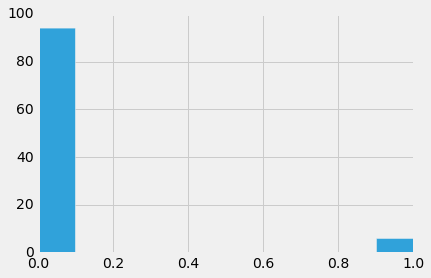

In [62]:
n    = 100 
sims = np.zeros(n)
for i in xrange(n):
    p       = rand_vector(4)
    sims[i] = det_sim(p,.3)

plt.hist(sims)

    
    